# Example of transforming relational data to similarity graph

## Load libraries

In [5]:
import networkx as nx

from functools import partial

from data2graph.measures import measure, caterogical, numerical
from data2graph.measures.measure import Measure
from data2graph.network.network import Network
from data2graph.network.weight import Weight
from data2graph.network import network, load, weight, algorithm

from data2graph.datasets import loader

## Load data

In [6]:
X, y, types = loader.load_breast_cancer_short()

## Choose method of measuring distance

In [7]:
ms = Measure(numerical_strategy=numerical.euclidean, categorical_strategy=caterogical.goodall_3)

## Choose way of  constructing graph, its density/threshold and method of weighting

In [8]:
ns = Network(load_strategy=partial(load.load_graph_weight_distance_no_negative, alg="density", beta=0.1),
             weight_strategy=algorithm.weight_by_pagerank)

In [24]:
measure_strategy = measure.Measure(numerical_strategy=numerical.manhattan, categorical_strategy=caterogical.iof)
measures = measure_strategy.compute(X, types)
network_strategy = network.Network(load_strategy=partial(load.load_graph_weight_similarity),
                                    weight_strategy=algorithm.weight_by_random)
G = network_strategy.load(measures, y)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

## Investigation of data similarity graph

In [25]:
betweenness = nx.betweenness_centrality(G)

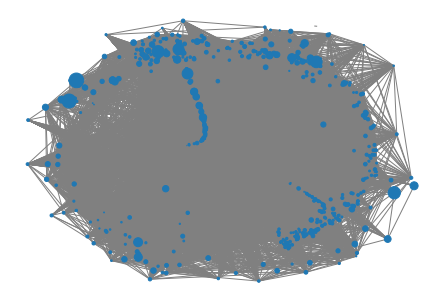

In [26]:
node_size = [betweenness[n]*1000 for n in G.nodes]
nx.draw(G, node_size=node_size, edge_color='gray', layout=nx.fruchterman_reingold_layout)